# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.tools import load_json

# Import RAW data with description

In [2]:

data = load_json('../data/train/train_descripcion_accents.json')
# Now cast data to a DataFrame
df = pd.DataFrame(data)
print(df.shape)
df.head()

(50099, 5)


,id_oferta,categoria,subcategoria,descripcion_oferta,id_puesto_esco_ull
0,ef5a8ae0a743018628df9bd53893bb,Administracion de empresas,Administracion,Empresa de caracter internacional solicita adm...,1634
1,47137c06a640348ca4cb7dcbf938b1,Sanidad y salud,Medicina general,Las funciones a desempenar son las propias del...,611
2,cdfb72672340819a6721db72eee187,Comercial y ventas,Comercial,Buscamos persona para puesto de Chofer -Repart...,2825
3,5746210e854264aaca9452f4d377a4,Ventas al detalle,Venta al detalle,Abrimos proceso de seleccion para dependiente ...,1984
4,8a1bda0c91438bb4133f32e392a1ce,Ventas al detalle,Venta al detalle,Tus funciones principales seran: - Atencion a...,1984


# Get the words and count of them in the full dataframe

In [52]:
# from functions.descripcion import clean_descripcion
import re

list_remove = ["www", "com","http", "https"]

def tokenize_descripcion(text):
    # Remove links (URLs) from the text using regular expressions
    text = re.sub(r'http(s)?:\s+\S+', '', text, flags=re.IGNORECASE)
    # Remove all occurrences of ".es" (case-insensitive)
    text = re.sub(r'\.es', '', text, flags=re.IGNORECASE)
    # Remove all non alpha characters from the text using regular expressions
    text = re.sub(r'[^a-zA-Z ]+', ' ', text, flags=re.IGNORECASE)
    # Remove unnecessary spaces from the text using regular expressions
    text = re.sub(r'\s+', ' ', text, flags=re.IGNORECASE)
    # Cast all words to lowercase
    text = text.lower()
    return text

def create_palabras_column(text):
    # Split the text into a list of words and filter simultaneously
    palabras = [palabra for palabra in text.split(" ") if len(palabra) > 1 and palabra not in list_remove]
    return palabras

def clean_descripcion(df):
    # tokenize the descripcion
    df['descripcion_oferta'] = df['descripcion_oferta'].apply(tokenize_descripcion)
    # Split the text into a list of words
    df['palabras_descripcion_oferta'] = df['descripcion_oferta'].apply(create_palabras_column)
    return df
df = clean_descripcion(df)
df['descripcion_oferta'].iloc[830]
# Remove all non alpha characters from the text using regular expressions
# oferta = df['descripcion_oferta'].iloc[2]
# Remove all non alpha characters from the text using regular expressions
# oferta = re.sub(r'[^a-zA-Z ]+', ' ', oferta, flags=re.IGNORECASE)
# print(oferta)

'en century capital lpa galardonada como oficina no en transacciones y no en facturacion de espana dentro de la red internacional de franquicias inmobiliarias century queremos incorporar a nuestro equipo un nuevo asesor inmobiliario buscamos una persona con el siguiente perfil don de gente buena imagen personal empatic gran capacidad de planificacion y organizacion excelente capacidad de comunicacion responsable y proactiv vision emprendedora autonomo fuerte orientacion hacia los resultados ofrecemos horarios totalmente adaptables asi como la opcion de trabajar desde casa o en cualquiera de nuestras dos oficinas formacion especializada y continua century university plan de carrera en empresa con fuerte crecimiento orientado al exito herramientas tecnologicas orientadas a conseguir aumento de la productividad y una mejora de los resultados sistema de remuneracion que aumenta de forma proporcional a tus logros tu pones el limite tus funciones seran asesoramiento y atencion personalizada 

In [48]:
from urllib.parse import urlparse

def extract_links(text):
    # Regular expression pattern for finding URLs in text
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    
    # Find all matches in the text
    urls = re.findall(url_pattern, text)
    
    # Parse and return the URLs
    parsed_urls = [urlparse(url) for url in urls]
    
    return parsed_urls
text = "http: example.com some text here http: anotherlink.com and more text."
print("Before: " + text)
print()
links = extract_links(text)

for link in links:
    print(f"URL: {link.geturl()}")
    print(f"Scheme: {link.scheme}")
    print(f"Netloc: {link.netloc}")
    print(f"Path: {link.path}")
    print(f"Params: {link.params}")
    print(f"Query: {link.query}")
    print(f"Fragment: {link.fragment}")
    print()

Before: http: example.com some text here http: anotherlink.com and more text.



In [30]:
# from nltk.stem import SnowballStemmer
# spanish_stemmer = SnowballStemmer('spanish')
# # Try and example
# string = "hola como estas"
# print([spanish_stemmer.stem(word) for word in string.split()])

['hol', 'com', 'estas']


In [28]:
# import re
# import pandas as pd
# from nltk import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet

# data = load_json('../data/train/train_descripcion_accents.json')
# # Now cast data to a DataFrame
# df = pd.DataFrame(data)
# print("Before: " + str(df['descripcion_oferta'].iloc[0]))
# wnl = WordNetLemmatizer()

# # Function to map POS tags from Penn Treebank POS tags to WordNet POS tags
# def get_wordnet_pos(treebank_tag):
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN  # Default to noun

# def clean_text(text):
#     # Delete all non-alphabetic characters from the text using regular expressions.
#     cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)
#     # Remove additional spaces from the text.
#     cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
#     # Cast all the characters to lowercase.
#     cleaned_text = cleaned_text.lower()
#     # Tokenize the text into a list of words.
#     cleaned_text = word_tokenize(cleaned_text)
#     # Tag the words with POS tags.
#     pos_tags = pos_tag(cleaned_text)
#     # Cast the verbs to their base form (infinitive) using lemmatization with the correct POS tags.
#     cleaned_text = [wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
    
#     return ' '.join(cleaned_text)

# # Apply the clean_text function to the 'descripcion_oferta' column
# # Take the first 10 records of the df
# new_df = df['descripcion_oferta'].iloc[:11]
# examples = new_df.apply(clean_text)
# print("After: " + examples[0])


Before: Empresa de caracter internacional solicita administrativo a para el area de operaciones logistica para el turno de tarde (horario de 14:00 a 22:00).  Imprescindible dominio alto del ingles y manejo de Navision   Business Central.    Requisitos:  - Conocimientos de ingles avanzado (hablado y escrito)  - Manejo avanzado de Microsoft Dynamics Navision   Business Central  - Manejo del paquete office
After: empresa de caracter internacional solicita administrativo a para el area de operaciones logistica para el turno de tarde horario de a imprescindible dominio alto del ingles y manejo de navision business central requisitos conocimientos de ingles avanzado hablado y escrito manejo avanzado de microsoft dynamic navision business central manejo del paquete office


# Cast the type of the column ID from float to int

In [ ]:
# Now cast id_puesto_esco_ull to int (delete the comma and the number after it)
df['id_puesto_esco_ull'] = df['id_puesto_esco_ull'].astype(int)
df.head()

,id_oferta,categoria,subcategoria,descripcion_oferta,id_puesto_esco_ull,descripcion_oferta_words
0,ef5a8ae0a743018628df9bd53893bb,Administracion de empresas,Administracion,Empresa de caracter internacional solicita adm...,1634,"[empresa, de, caracter, internacional, solicit..."
1,47137c06a640348ca4cb7dcbf938b1,Sanidad y salud,Medicina general,Las funciones a desempenar son las propias del...,611,"[las, funciones, a, desempenar, son, las, prop..."
2,cdfb72672340819a6721db72eee187,Comercial y ventas,Comercial,Buscamos persona para puesto de Chofer -Repart...,2825,"[buscamos, persona, para, puesto, de, chofer, ..."
3,5746210e854264aaca9452f4d377a4,Ventas al detalle,Venta al detalle,Abrimos proceso de seleccion para dependiente ...,1984,"[abrimos, proceso, de, seleccion, para, depend..."
4,8a1bda0c91438bb4133f32e392a1ce,Ventas al detalle,Venta al detalle,Tus funciones principales seran: - Atencion al...,1984,"[tus, funciones, principales, seran , atencion..."


In [4]:
df['descripcion_oferta_words'].iloc[2]

KeyError: 'descripcion_oferta_words'

# Create a dict with the words (keys) and the count (values)

In [5]:
from functions.descripcion import create_words_count_fulldataset
words_dict = create_words_count_fulldataset(df)

# Create by ID a dict with words (keys) and count (values)

In [6]:
from functions.descripcion import create_words_count_groupdataset
words_group_dict = create_words_count_groupdataset(df)

# Get the stopwords (Spanish + English)

In [7]:
# Get a list of words which is the spanish and english stopword from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
stop_words.extend(stopwords.words('english'))

# Filter stopwords

In [8]:
from functions.descripcion import filter_stop_words
words_dict = filter_stop_words(words_dict, stop_words)

# Filter stopwords by ID

In [9]:
from functions.descripcion import filter_stop_words_grouped
words_group_dict = filter_stop_words_grouped(words_group_dict, stop_words)

# Delete adverbs and extract infinitive of the verb

In [10]:
import nltk
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def penn_to_wordnet(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN 

[nltk_data] Downloading package punkt to /home/fulp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/fulp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/fulp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def process_words(word_list):
    lemmatizer = WordNetLemmatizer()
    processed_words = []

    for word in word_list:
        pos_tags = pos_tag([word])
        
        # Remove adverbs (RB)
        if pos_tags[0][1] != 'RB':
            # Convert Penn Treebank POS to WordNet POS
            wordnet_pos = penn_to_wordnet(pos_tags[0][1])
            # print(wordnet_pos)
            # Lemmatize the word to get its base form
            lemmatized_word = lemmatizer.lemmatize(word, wordnet_pos)
            processed_words.append(lemmatized_word)

    return processed_words

word_list = df['descripcion_oferta_words'].iloc[2]
print("Before: " + ' '.join(word_list))
word_list = process_words(word_list)
print("After: " + ' '.join(word_list))

Before: buscamos persona para puesto de chofer repartidorventas se encargaria de repartir a nuestros clientes y a su vez llevar un seguimiento de ventas de los clientes
After: buscamos persona para puesto de chofer repartidorventas se encargaria de repartir a nuestros clientes y a su vez llevar un seguimiento de ventas de los clientes


# Sort and delete by count

In [30]:
def sort_by_count(words_dict):
    return sorted(words_dict.items(), key=lambda x: x[1], reverse=True)
def delete_words_by_count(words_dict, min_count, max_count):
    output_words_dict = {}
    for word in list(words_dict):
        if words_dict[word] >= min_count and words_dict[word] <= max_count:
            output_words_dict[word] = words_dict[word]
    return output_words_dict
            
print("Before: " + str(len(words_dict)))
words_dict_deleted = delete_words_by_count(words_dict, 5, 1500)
print("After: " + str(len(words_dict_deleted)))

Before: 43596
After: 19245


# Plot words VS count

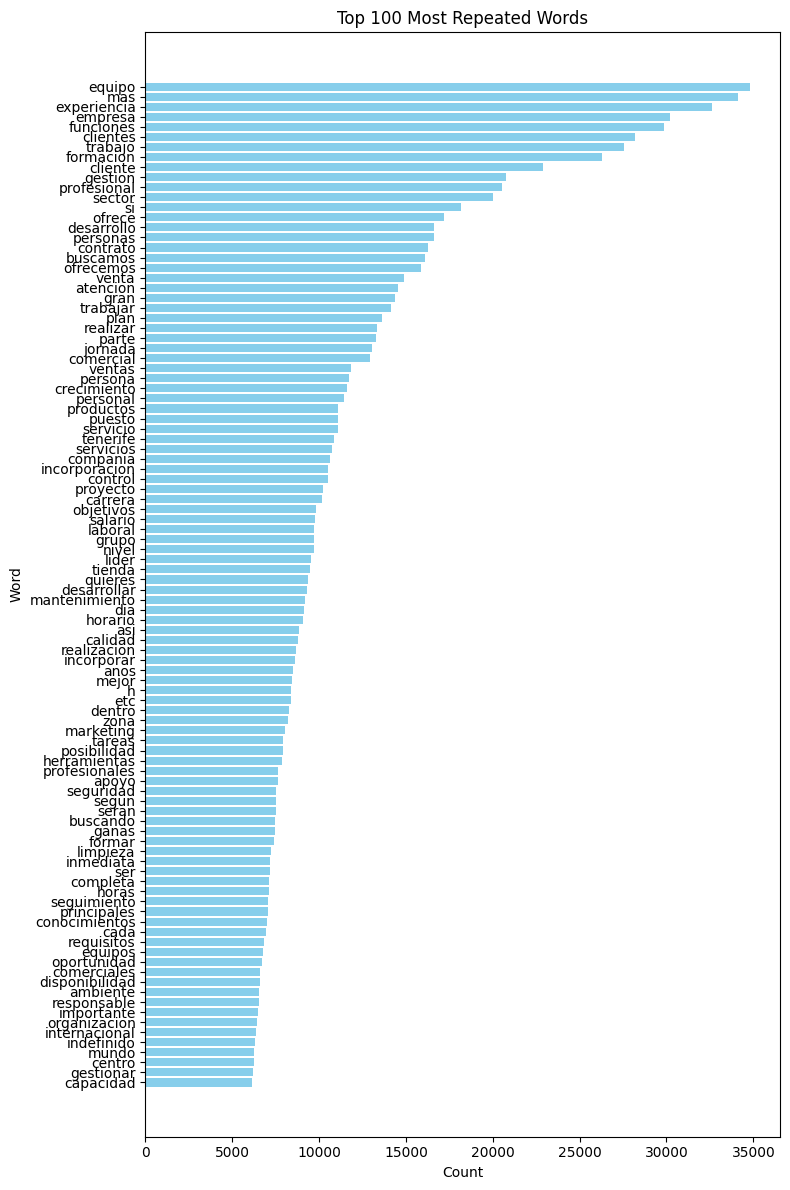

In [31]:
from functions.descripcion import plot_words_count
plot_words_count(words_dict, 100)

# Plot words VS count by ID

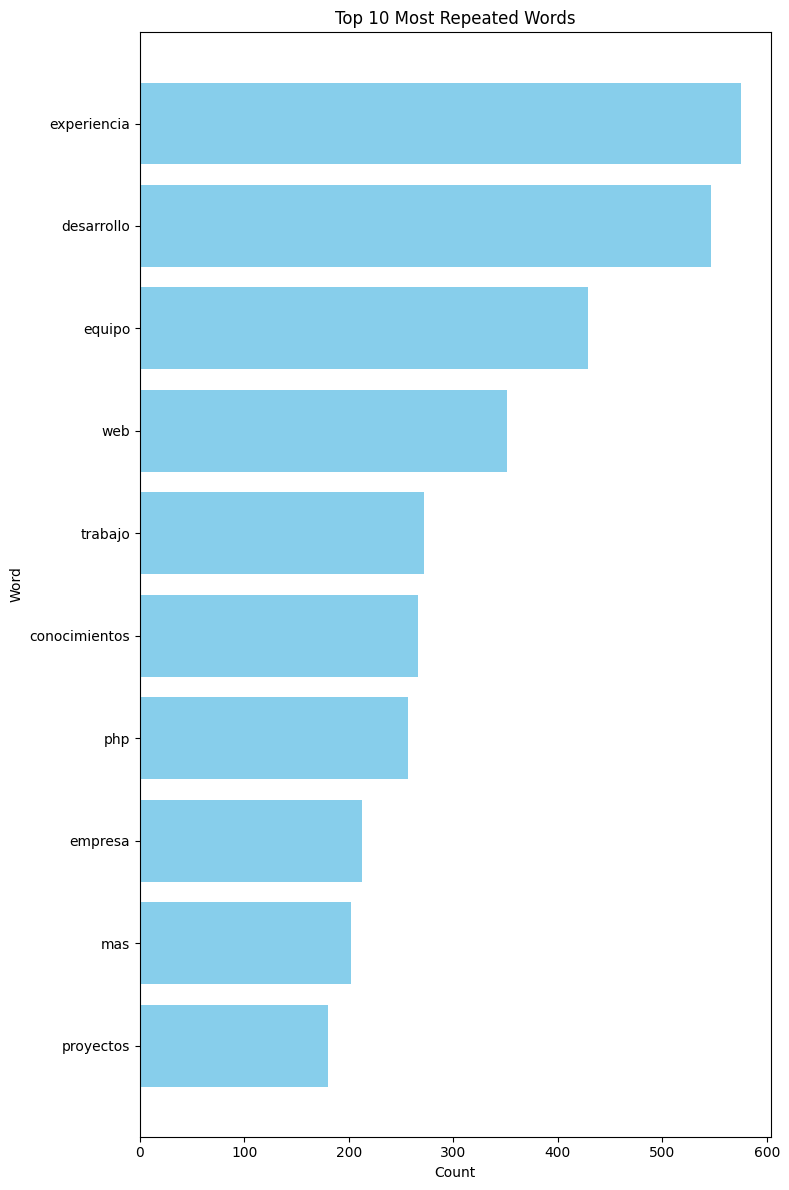

In [32]:
# from functions.descripcion import plot_words_count_grouped
def plot_words_count_grouped(words_group, id, N=50):
    try:
        plot_words_count(words_group[id], N)
    except:
        print('The id ' + str(id) + ' is not in the dataset')
plot_words_count_grouped(words_group_dict, 941, 10)

# Add column formated

In [33]:
from functions.descripcion import create_palabras_empleto_texto_column
# Introduce into the DataFrame as column palabras_empleo_texto
df['palabras_empleo_texto'] = create_palabras_empleto_texto_column(df, words_dict_deleted)

# Save dataframe

In [34]:
columns = ['id_oferta','id_puesto_esco_ull','categoria','subcategoria','palabras_empleo_texto']
# Save as json as a list of dict
df[columns].to_json('../data/train/train_palabras_empleo_texto.json', orient='records')